In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

The dataset contains the data of the customer. on the basis of the data we have to predict the churn rate by the customer

The dataset contains the data like 'customer ID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure','PhoneServices', 'Multiplelines','InternetServices', 'OnlineSecurity', 'OnlineBackup','Sevice Protection','TechSupoort', 'SteamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MontlyCharges','TotalCharges' and 'Churn'

Chum rate ( sometimes called attrition rate ) , in its broadest sense , is a measure of the number of individuals or items moving out of a collective group over a specific period . It is one of two primary factors that determine the steady - state level of customers a business will support . The term is used in many contexts , but is most widely applied in business with respect to a contractual customer base , for example in businesses with a subscriber - based service model such as mobile telephone networks and pay TV operators . The term is also used to refer to participant turnover in peer - to - peer networks . Churn rate is an input into customer lifetime value modeling , and can be part of a simulator used to measure return on marketing investment using marketing mix modeling .

# Importing Dataset

In [4]:
#using url also we will create a data frame but the raw link will be open in the web after words the file will run 
# df=pd.read_csv('
# https://raw.githubusercontent.com/dsrscientist/dsdata/master/telecom_customer_churn.csv')
#df

In [5]:
df=pd.read_csv('Telecom_Customer_Churn.csv')

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


This dataset contains the details of customers in which both numerical and categorical data are present. here "Churn" is the target variable which contains 2 catogories so it will be termed as "classification problem" where we need to predict the several chrunusing the classification models. 

In [7]:
# in case we are not using the 10 it shows only 5 rows
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#seniorCitizen column will be the -first check the number of unique values present in a specific column, it dosent matter its zero one,two,three, four, five etc we can't say its continues columns its a numeric columns, becuase values are already encoded in the numerical form its not mandatory just becuse the value that 0.5,5.5, dicimal format or whole number format are present in that case, then its continuous data

In [8]:
#its shows the last five rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# Exploratory Data Analysis(EDA)

In [9]:
#Checking the dimenstion of the dataset
df.shape

(7043, 21)

The dataset contains 7043 rows and 21 columns, out of which 1 is target variable and remaining 20 are independent variables

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# checking the columns of dataset
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [12]:
#cheking the types of columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
#montly chages columns present in float datatypes

there are three different types of data (int64,float, and object) present in the dataset

#np.nan, None, NaN, others

In [14]:
a="12.5"
type(a)

str

In [15]:
a=12.5
type(a)

float

In [16]:
#checking the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In the above data their is no null value

In [17]:
#first check null value ---sum of all the null value -----check the sum of all the values
df.isnull().sum().sum()

0

In [18]:
#it finds the information about the dataframes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#In the above data total chages columns as per the Dataframe float value in the above info are total charges are object means soomthing wrong is their

In [19]:
#cheking the unique in the dataframe
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [20]:
#checking the count of unique value-using nunique
df['TotalCharges'].nunique()

6531

In [21]:
df.shape[0]

7043

we can notice that "Total Charges" has continuous data but its will reflecting as object datatypes.and 11 recors of this columns has blank data, Lets handles this columns

In [22]:
#checking the value count of each columns-count of unique value present in the each columns
for i in df.columns:
    print(df[i].value_counts()) #i is uning for the first columns-it itrates 
    print("\n")

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No         

these are the value counts of all columns and we can see blank in TotalCharges column.Lets check out the unique values of that columns

<AxesSubplot:>

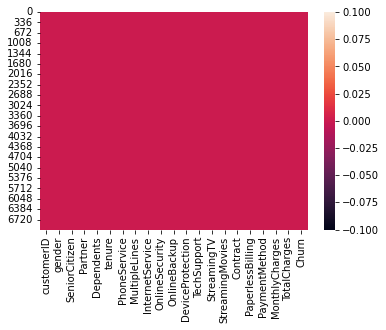

In [23]:
#Sns is the library sns-seaborn library
#lets visualize it using heatmap for null values
sns.heatmap(df.isnull())

In [24]:
#checking the space in totalcharges coluns  iloc-function used for index location,
#where as the loc function used for the name of the columns
#== is used to compare the value, = is used for asign the value
df.loc[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


By locationg the Total charges we can find this columns has space as values but it was showing 0 missing values in this column. Lets fill this columns by some values

In [25]:
#replace (" ",np.nan)-Numpy.nullvalues
#in this code we will replaceing thenupy values in to nan values
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [26]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [27]:
#Converting object datatypes to float datatype- its called type casting converting one datatype to another datatype is called type casting
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

Now we can see total charges columns has some space values which is replaced by nan values. Now we will handle the nan values

we have converted the datatype of "TotalCharges " from object to float

In [28]:
#lets check the null values again
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

as we have filled blank spaces with nan values in totalCharges, its showing 11 null values in that column.Repalceing the NAN values using mean method as the data has continous values

In [29]:
#we can use the ittrative method or use k&N imputer method also basically the data replacing the null values with some values and known as data imputation and also mean, meadian , etc 
#we are using the numpy method
np.mean(df["TotalCharges"])

2283.3004408418697

In [30]:
df.iloc[488,:]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [31]:
#Checking the mean of totalCharges column
print("The mean value of the TotalCharges is:", df["TotalCharges"].mean())

The mean value of the TotalCharges is: 2283.3004408418697


In [32]:
#Filling null values in TotalCharges with its mean
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

<AxesSubplot:>

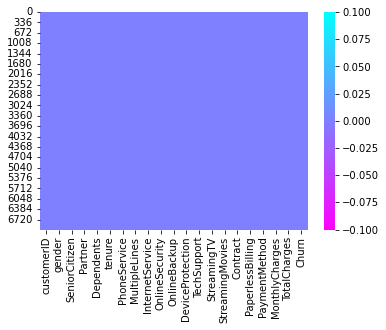

In [33]:
#lets check the null values again
sns.heatmap(df.isnull(), cmap="cool_r") #is null is the nameofmymethod cmap-colourmap-coor_r is the color of the map

Now we can see there are nomissing values in any of the column

In [34]:
#Separting Numerical and categorical column

#checking for Categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":     #dtypes[i]-dtypes of any columns object it will append that columns in empty list 
        categorical_col.append(i)    #append method is used to add the value in your existing list
print("Categorical Columns:", categorical_col)
print("\n")

#Checking for Numerical columns
#Explanatory mark is used for not- when the condition my datatype is not object in that time  
#cont--is not satisifed in that time it append the numerical list
numerical_col = []        #creating empty list
for i in df.dtypes.index:
    if df.dtypes[i]!='object':      
        numerical_col.append(i)
print("Numerical Columns:", numerical_col)

Categorical Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [35]:
#Checking number of unique value in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


these are the unique vales present in the datset.Here CustomerID column has the dat of unique ID to the customers which can be dropped 

In [36]:
#Dropping customerID column
#Axis=1 is deleting the column, in case we moving or deleting the row we provide axis-0
#inplace=true so that it will reflect in my original dataframe
df.drop("customerID", axis =1, inplace=True) 


In [37]:
#we are sseing the original data customer id has been droped
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
#checking the list of counts of target
df["Churn"].unique()


array(['No', 'Yes'], dtype=object)

these are two categories present in the target column namely "yes" and "No"

In [39]:
#Checking the unique values in target columns
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

we can assume that "NO" stands for the customers who have not churned and "yes" stands for the customers who have got churned from the company 

# Description of Dataset

In [40]:
#Statistical summary of numerical columns
df.describe()   #describe method is used to sumeerize the few things

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


This gives the statistical information of the numerical columns. The summary of the Datasets looks perpect since there is no negative/incvalid values present 

From the above description we can observe the following:-

1. The counts of all the columns are same which means there are no missing value in the datssets
2.the mean value is greater than the median(50%) in tenure and TotalCharges columns which means the data is skewed to right in these columns
3.The data in the column MonthlyChrges have mean value less than median which means the data is skewwd to left
4.By Summarizing the data we can observe there is a huge difference between 75% and max hence there are outliers present in tha data
5.we can also notice the standard deviation, min,25% percentile values from this describe method


# Data Visualization

# Univariate Analysis

Univariate analysis-when doing a analysis on a single columns this is called the universe analysis

No     5174
Yes    1869
Name: Churn, dtype: int64


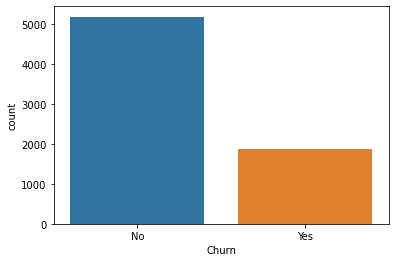

In [41]:
#Visualize the number of Churned customer

ax = sns.countplot(x='Churn',data=df)
print(df['Churn'].value_counts())

We can observe that the count of "No Churn" are high compared to the count of "Yes Churn" i.e there are more number of customer who have not churned
This leads to class imbalance issues in the data. we will rectify it by using oversampling method in later part

Male      3555
Female    3488
Name: gender, dtype: int64


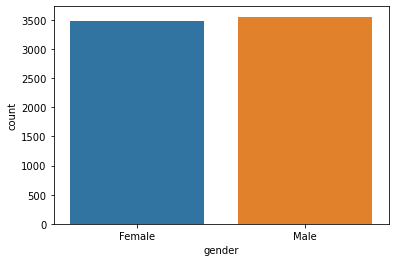

In [42]:
#Visualizating the count of Gender
print(df['gender'].value_counts())
ax = sns.countplot(x='gender',data=df)
plt.show()

from the plot we can observe that the total number of males and females are almost same

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


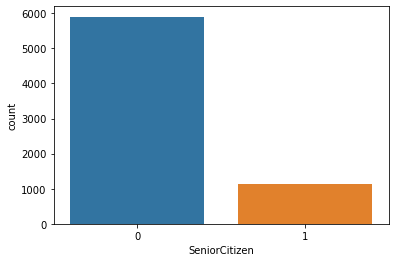

In [43]:
#Visualizing the count of senior Citizen
print(df['SeniorCitizen'].value_counts())
ax = sns.countplot(x='SeniorCitizen',data=df)
plt.show()

Here 0 reprocents non-senior citizen and 1 reprosents senior citizen. the count of 0 is high compared to 1 which means the number of non senior citizens are quite high comapred to senior citizen data in the datset

No     3641
Yes    3402
Name: Partner, dtype: int64


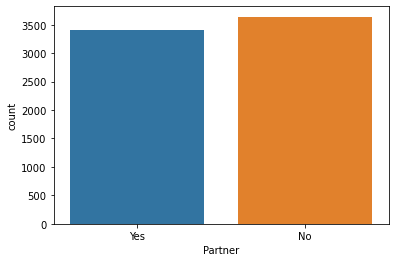

In [44]:
#Visualizing the count of partner
print(df['Partner'].value_counts())
ax = sns.countplot(x='Partner',data=df)
plt.show()

Non partners are bit high in count customer having the partners

No     4933
Yes    2110
Name: Dependents, dtype: int64


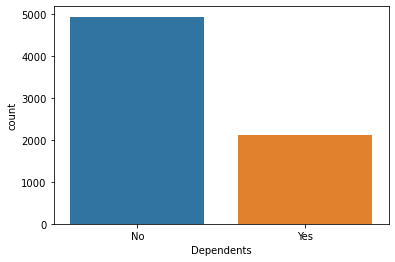

In [45]:
#Visualizing the count of dependent
print(df['Dependents'].value_counts())
ax = sns.countplot(x='Dependents',data=df)
plt.show()

The customer who have dependent are less comapred to non dependent

Yes    6361
No      682
Name: PhoneService, dtype: int64


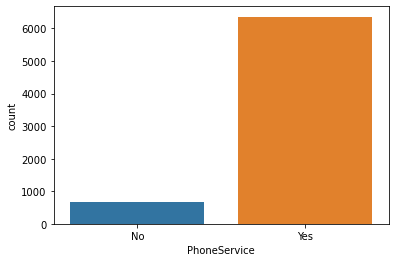

In [46]:
#Visualizing the count of PhoneService
print(df['PhoneService'].value_counts())
ax = sns.countplot(x='PhoneService',data=df)
plt.show()

The customers who have phone services are large in numbers and who do not own phone serives are very less in numbers

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


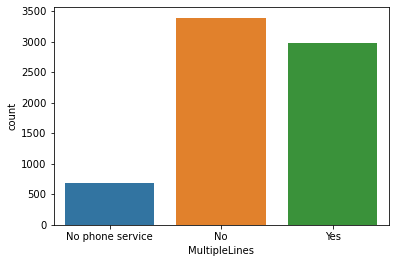

In [47]:
#Visualizing the count of Multiplelines
print(df['MultipleLines'].value_counts())
ax = sns.countplot(x='MultipleLines',data=df)
plt.show()

The customer having the phone services from single line have high counts comapred to cutomers having phone services from multipleline, also the customer who do not have phone services have covered very less data compared to others

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


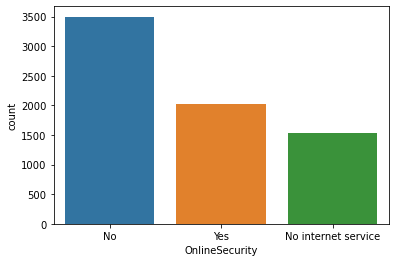

In [48]:
#Visualizing the count of OnlineSecurity
print(df['OnlineSecurity'].value_counts())
ax = sns.countplot(x='OnlineSecurity',data=df)
plt.show()

we can observe that the customer having no internet have very less online backup counts comapred to others

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


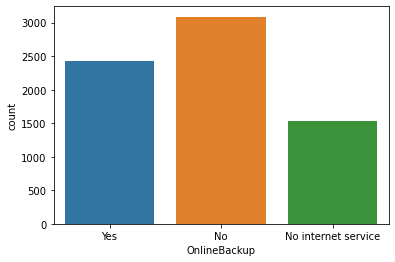

In [49]:
#Visualizing hbow many customer of onlinebackup
print(df['OnlineBackup'].value_counts())
ax = sns.countplot(x='OnlineBackup',data=df)
plt.show()

we can observe that the customer having no internet services have very less online backup counts compared to others

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


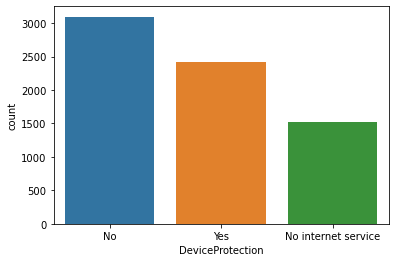

In [50]:
#Visualizing hbow many customer of DeviceProtection
print(df['DeviceProtection'].value_counts())
ax = sns.countplot(x='DeviceProtection',data=df)
plt.show()

the Customer who do not need nay technical support are high in counts compared to the customers who need technical support

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


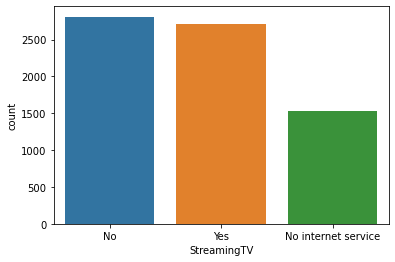

In [51]:
#Visualizing hbow many customer have StreamingTV
print(df['StreamingTV'].value_counts())
ax = sns.countplot(x='StreamingTV',data=df)
plt.show()

The Customer who do not use Streaming TV are little bit high in numbers than the customers who do use StreamingTV, and the customer who do not own intrnet they do not have this serive match 

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


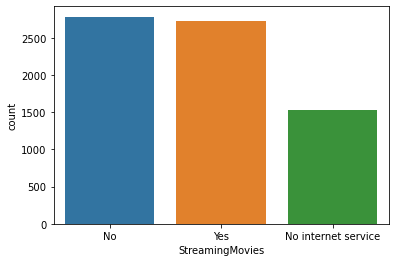

In [52]:
#Visualizing hbow many customer have StreamingMovies
print(df['StreamingMovies'].value_counts())
ax = sns.countplot(x='StreamingMovies',data=df)
plt.show()

The Customer who do not have Streaming Movies are high in count followed by the customer who have StreamingMovies service, and the customer who do not own intrnet they have less streaming movies service compared to others

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


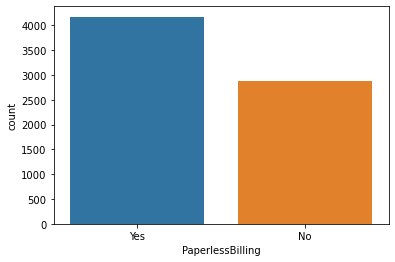

In [53]:
#Visualizing how many customer have payment method
print(df['PaperlessBilling'].value_counts())
ax = sns.countplot(x='PaperlessBilling',data=df)
plt.show()

Most of the customers prefer paper billing and avg number of customers eho donot pregfer paper less billing, they maylike to recive paper billing

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


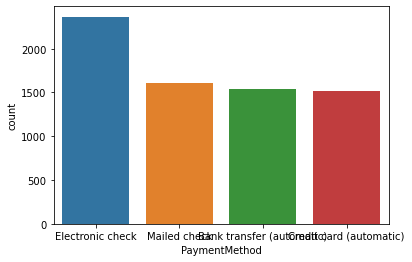

In [54]:
#Visualizing how many count payment method
print(df['PaymentMethod'].value_counts())
ax = sns.countplot(x='PaymentMethod',data=df)
plt.show()

most Customer prefer Electronic check payment method and the customer who prefer Mailed check, bank transferand credit card have avg in count

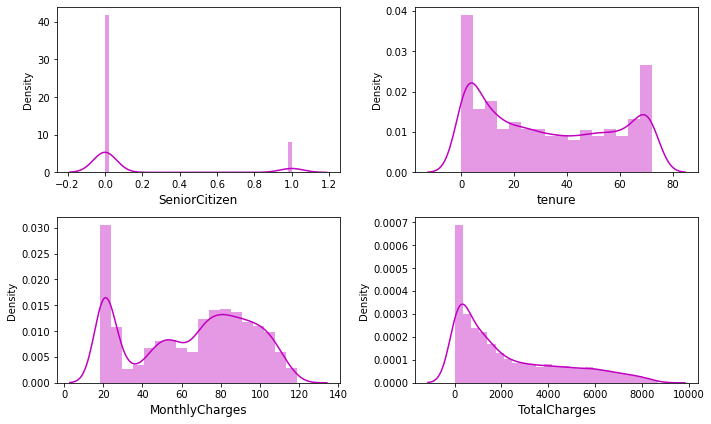

In [55]:
#Lets Check the data has been distributed in remaining column
#subplots are using for multiple plots using single plot
#plt is method -figsize is dimention-10 , 6 - face color is white
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for col in numerical_col:   # for col using numerical_col
    if plotnumber<=4:       #pltnumber is less than four equal to 4 each grap we are using four plot
        ax = plt.subplot(2, 2, plotnumber) #number of plot in given dimenstion using subplot 
        sns.distplot(df[col], color = "m") #plt colour for columns
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize =10)
    plotnumber+=1
plt.tight_layout()

from the above ditribution plots we can notice that the data almost looks nornal in all the columns except seniorcitzen, and the data in the column TotalCharges is skewed to the right.Other two columns tenure and monthlyCharges do not have skewness

# Bivariate Analysis

Bivariate analysis done between two columns, universe analysis - using single columns

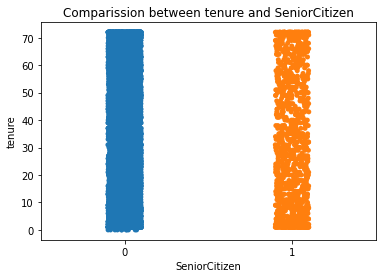

In [56]:
# Comparing tenure and seniorCitizen
plt.title("Comparission between tenure and SeniorCitizen")
sns.stripplot(x="SeniorCitizen", y= "tenure", data = df)
plt.show()

there is no significant between the feature, here both the features are in equal length

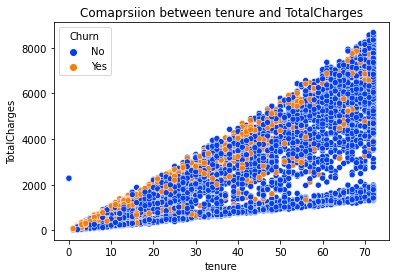

In [57]:
#Comapring tenure and TotalCharges
plt.title("Comaprsiion between tenure and TotalCharges")
sns.scatterplot(x = 'tenure', y = 'TotalCharges', data = df, hue = 'Churn', palette ='bright')
plt.show()

#data is the method to check the source
#mandatoary to analysis to do a all the columns

Here we can notice the strong linear relation between the features.

As the tenure increses, TotalCharges also increases rapidly, if the customer have low tenure services than there is high chance of churn

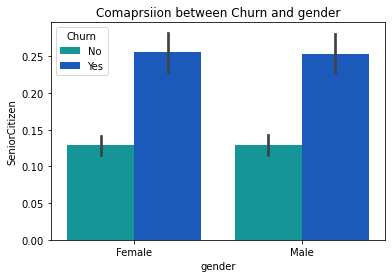

In [58]:
#Comapring gender and seniorCitizen on the basis of churn
plt.title("Comaprsiion between Churn and gender")
sns.barplot(x = 'gender', y = 'SeniorCitizen', data = df, hue = 'Churn', palette ='winter_r')
plt.show()

There is no significant difference between the columns, the customers churn remains unaffected in gender and senior citizen cases

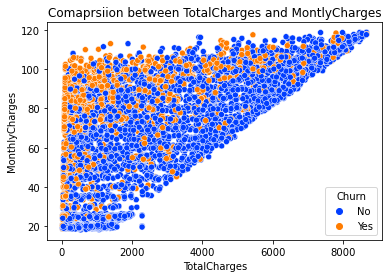

In [59]:
#Comapring tenure and TotalCharges
plt.title("Comaprsiion between TotalCharges and MontlyCharges")
sns.scatterplot(x = 'TotalCharges', y = 'MonthlyCharges', data = df, hue = 'Churn', palette ='bright')
plt.show()

There is a linear relationship b/w the features the customer with high montly charges have high tendency to stop the services since they have high total charges

Alos if the customer ready to cntribute with the monthly charges then there is an increment in the total charges

#you can use diffent plot insted scateer plot

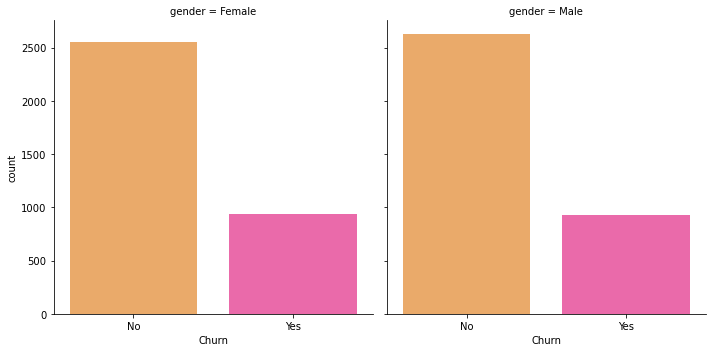

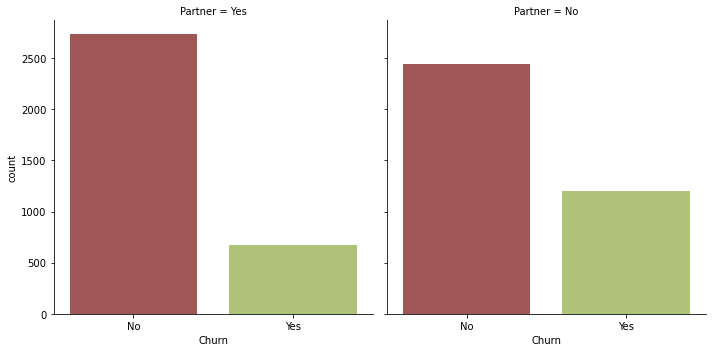

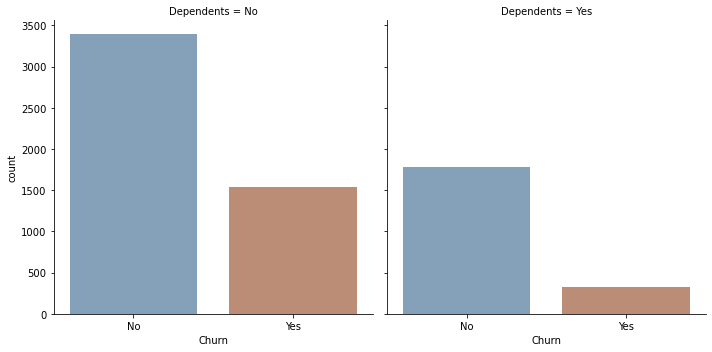

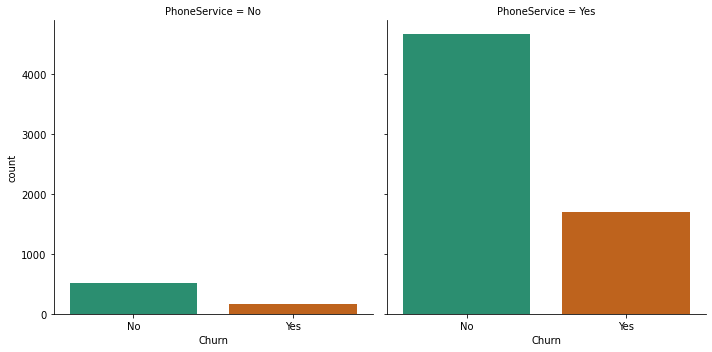

In [60]:
#Checking Churn level and gender
sns.catplot(x = 'Churn', col = 'gender', data = df, kind = "count", palette = "spring_r")

#checking churn level and partner
sns.catplot(x = 'Churn', col = 'Partner', data = df, kind = "count", palette = "tab20b_r")

#checking churn level and Dependents
sns.catplot(x = 'Churn', col = 'Dependents', data = df, kind = "count", palette = "twilight_shifted")

#checking churn level and PhoneService
sns.catplot(x = 'Churn', col = 'PhoneService', data = df, palette = "Dark2", kind = "count" )
plt.show()

1. In the first plot we can see there is no significant difference in the genders , both the genders have equal churn level . 
2. In the second plot we can see the customers without partners have high churn rate compared to the customers with partners . 
3. The customers who do not have any dependency have high churn rate compared to the customers who have dependents . 
4. In the last plot we can notice the customers who have phone service have high tendency of getting churned

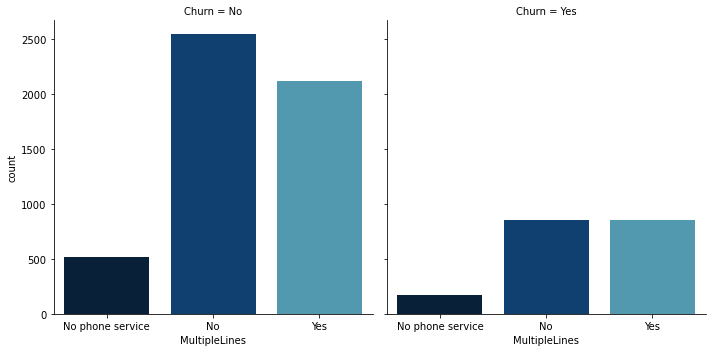

In [61]:
#ceking churn level and mutiplelines
sns.catplot(x='MultipleLines', col= 'Churn', palette= "ocean", kind = "count", data = df)
plt.show()

The customer who have phone service from single line have high churn rate comapred to the customer having phone services from multiple lines also there are very less number of customer who do not have phone services.

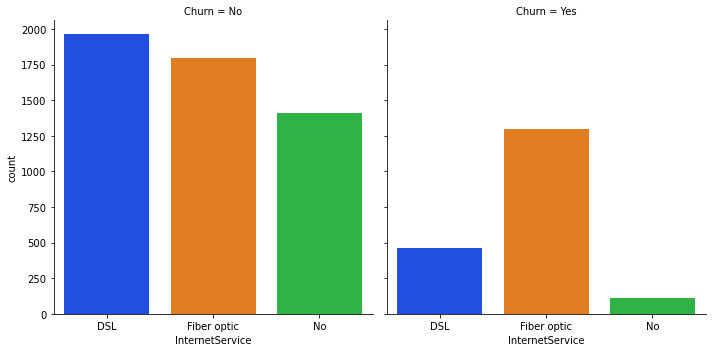

In [62]:
#cheking the churn levl in internet services
sns.catplot(x = 'InternetService', col= 'Churn', palette = "bright", kind = "count", data = df)
plt.show()

The ration of churn is high when the customer prefer fibre optic internet service comapred to other services, may be this type of serviceis bad and need to be focused on. And Customer who own DSL service they have very less churn rate

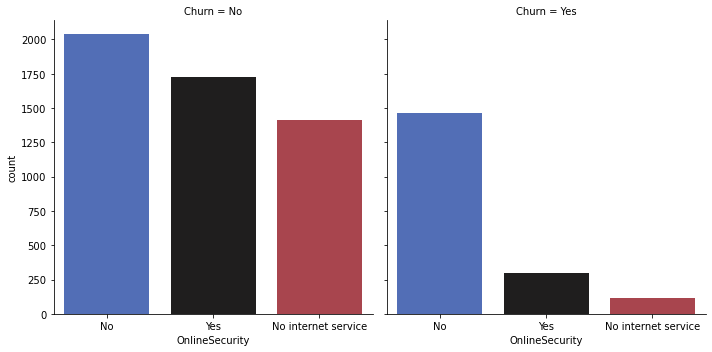

In [63]:
#Cheking churn level in online Security
sns.catplot(x = 'OnlineSecurity', col= 'Churn', palette = "icefire", kind = "count", data = df)
plt.show()

The customer who have no internet service have very less churn rate and the customer who do not have online security service have high tendency of getting churned

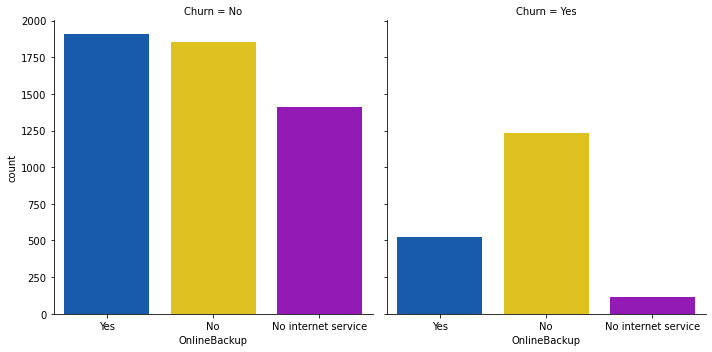

In [64]:
#Cheking churn level in online Security
sns.catplot(x = 'OnlineBackup', col= 'Churn', palette = "prism", kind = "count", data = df)
plt.show()

It is also same as in the case of online security. It is obvious that the customer who do not have internet service they do not need any online backup. The customer who do not have online backup service3es they have high churn rate

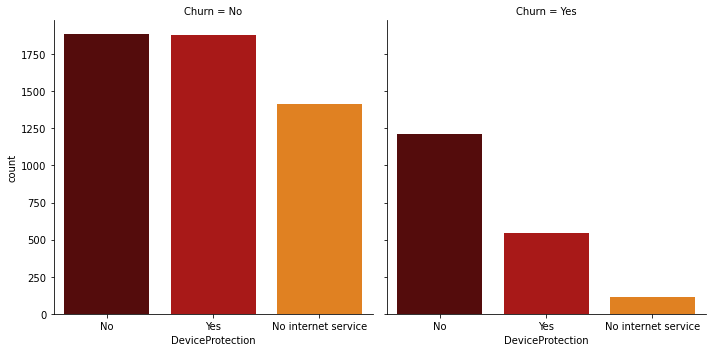

In [65]:
#cheking the churn levl in DeviceProtection
sns.catplot(x = 'DeviceProtection', col= 'Churn', palette = "gist_heat", kind = "count", data = df)
plt.show()

The customer who do not own any Device prtection have very high churn rate comapred to others

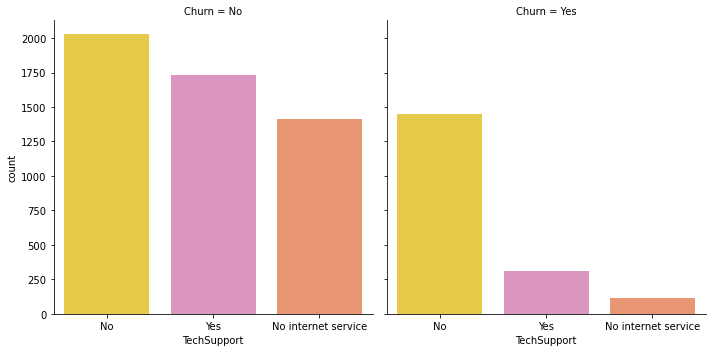

In [66]:
#cheking the churn levl in TechSupport
sns.catplot(x = 'TechSupport', col= 'Churn', palette = "Set2_r", kind = "count", data = df)
plt.show()

Here we can clearly see that the customer who do not have any techsupport then they churn ration

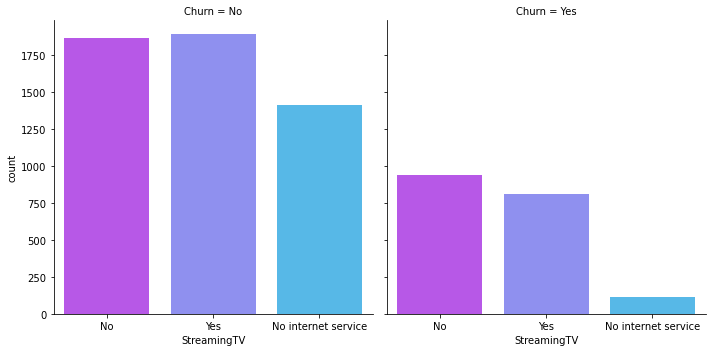

In [67]:
#cheking the churn levl in StreamingTV
sns.catplot(x = 'StreamingTV', col= 'Churn', palette = "cool_r", kind = "count", data = df)
plt.show()

In [68]:
#google search for col_wrap- catplotsklearn GS

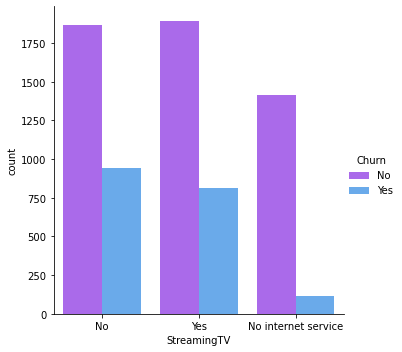

In [69]:
#cheking the churn levl in StreamingTV
#Here using col in hue
sns.catplot(x = 'StreamingTV', hue= 'Churn', palette = "cool_r", kind = "count", data = df)
plt.show()

the churn rate is nearly same if tge customer own Streaming TC or not

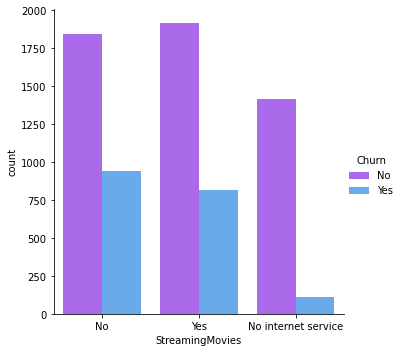

In [70]:
#cheking the churn levl in StreamingMovies
sns.catplot(x = 'StreamingMovies', hue= 'Churn', palette = "cool_r", kind = "count", data = df)
plt.show()

the customer who are existing in the company they do not won StreamingMovies in their devices. and the churn rate is low when the customer have don not internet servises

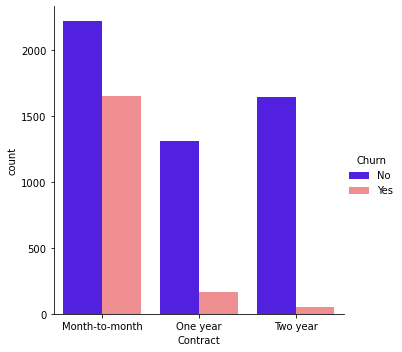

In [71]:
#cheking the churn levl in Contract
sns.catplot(x = 'Contract', hue= 'Churn', palette = "gnuplot2", kind = "count", data = df)
plt.show()

the customer who have churned are mostly having month to month contract

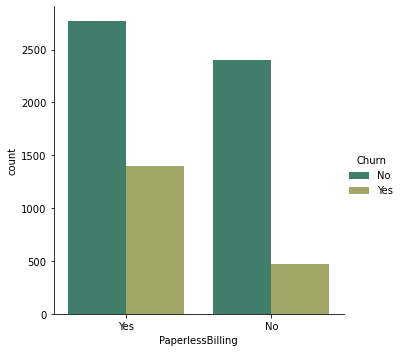

In [72]:
#cheking the churn levl in PaperlessBilling
sns.catplot(x = 'PaperlessBilling', hue= 'Churn', palette = "gist_earth", kind = "count", data = df)
plt.show()

The customer who prefer paperless billing have high churn rate

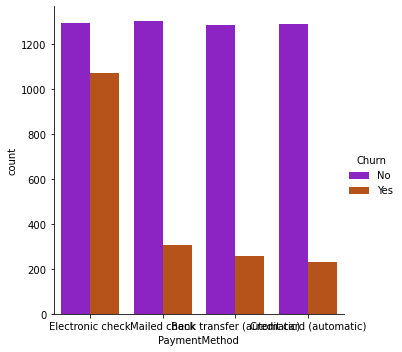

In [73]:
#cheking the churn levl in PaymentMethod
sns.catplot(x = 'PaymentMethod', hue= 'Churn', palette = "gnuplot", kind = "count", data = df)
plt.show()

The customer who prefer Electronic check have high churn rate also the customer who exists in the comapny uses equal payment method

# Multivariate Analysis

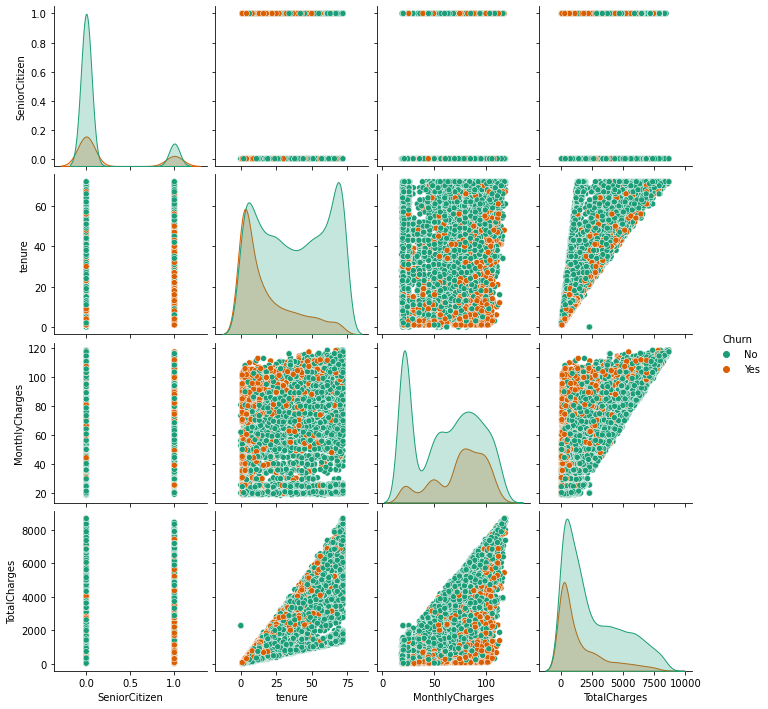

In [74]:
#for more than two coloumns using multivariate
sns.pairplot(df, hue="Churn", palette="Dark2")
plt.show()

1.The pairplot gives the pairwise relation between the feature on the basis of the target "Churn. on the diagonal we can notice the distribtion plots "
2.The feature tenure and TotalCharges, MonthlyCharges and TotalCharges have strong linear reation witheach other
3.There are no outlier in any of the columns but let's plot box plot to identify the outliers

# Checking for Outliers

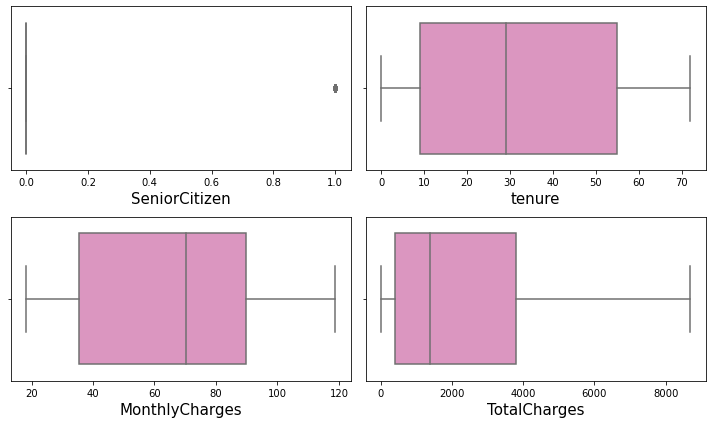

In [75]:
#lets check  the outliers by plotting boxplot.
#to detect the outlers using inter Quartile method
plt.figure(figsize=(10, 6), facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2, 2, plotnumber)
        sns.boxplot(df[col], palette= "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

The coloumn Senior Citizen has outliers but it contains categorical data so no need to remove outliers. Apart from this none of the columns have outliers

# Checking for Skewness

In [76]:
#The skewness value is less than +0.5 to -0.5 is the acceptable range
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

The columns SeniorCitizen and ToatalCharges have Skewness in the data, Since SeniorCitizen is catogorical no need to remove Skewness. Since totalcharges is continuous in nature. lets use cube root method to remove skewness.

# Removing Skewness

In [77]:
#Removing skewness using cuberoot method
df['TotalCharges']=np.cbrt(df['TotalCharges'])

We have removed the skewness using the cube root method

In [78]:
#Checking skewnes again
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64

we can see the skewness has been reduced in totalCharges columns

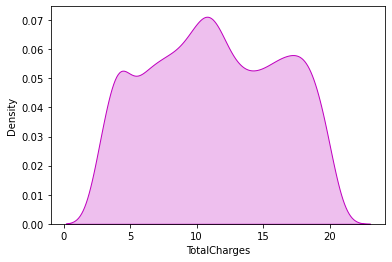

In [79]:
#lets visualize how the data has been ditsributed in total charges after removing skewness
sns.distplot(df['TotalCharges'], color="m", kde_kws={"shade":True}, hist = False)
plt.show()

This looks almost normal and skewness is also removed

# Encoding categorical columns

In [80]:
#different Encoding method are their using this method u can use- label, ordinal,hotencoder, pandas dot get them method 
#Encoding categorical columns using Ordinal Encoder
#OE -Ordinal Encoder -OE is variable name
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:   #using for loop itrating through the columns
    if df[i].dtypes=='object':   #and if the datatypes is object
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1)) #i am using ordinal encoder to fit transformation after that i am using the reshapping the value
df

# we directly using the code for coverting the string vaue into numerical vaue using encoding method

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


we have converted the categrical columns into numerical columns using Ordinal Encoding method

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


In the above information all the data are float/integer type before there is a objective value

In [82]:
#Statistical summary of numerical
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


After Encoding the categorical columns we can see all column details here. The Counts of all the columns are same taht means no null values in the datset This describemethod describe the count, mean,st,min,IQR, and max values of all the columns

# Correlation Between target varuiable and Independent variable

In [83]:
#cheking the correlation between feature and target
#cor -correlation
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


This gives the correlation between the dependent and independent variables. WE can Visualize this by plotting heatmap

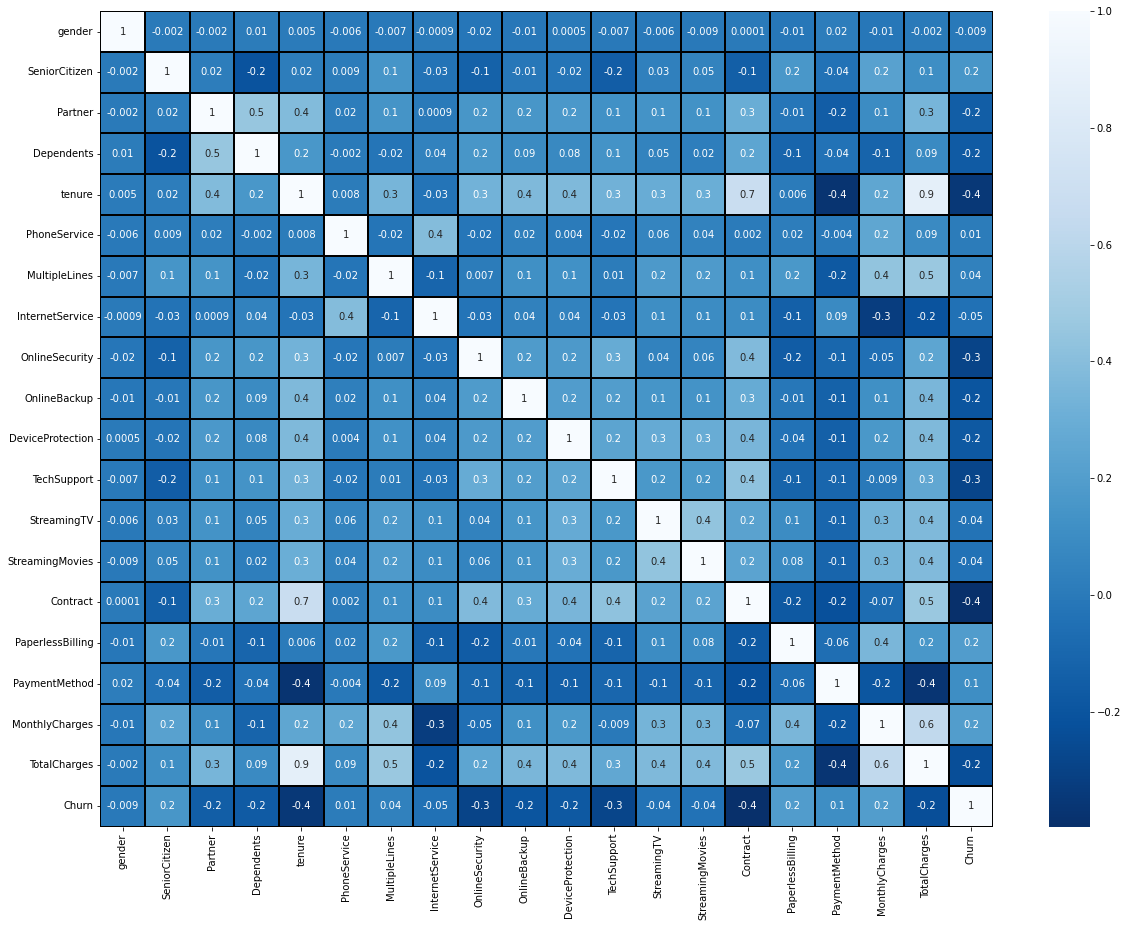

In [84]:
#Visualizing the correlation matrix by plotting heatmap
#for 2nd line again using corr linewidth, fmt-is the how many decimal value should be present
#annot=True is the the grap value will show in the white colours, 
#in casse Annot=False The grap value will shows in the same color it will not show it show s the same colour
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), linewidth = 0.1, fmt = ".1g", linecolor ="black", annot = True, cmap = "Blues_r")
plt.yticks(rotation= 0);
plt.show()

o- no relation, -0.3 to -0.3 -less correlation, greater than -0.5 to greater than +0.5- moderate corelation, greater than -0.7 or greater than +0.7 are high correlation

This heatmap shows the correlation matrix by visulaizing the data . We can observe the relation between feature to feature and feature to label . This heatmap contains both positive and negative correlation 
1. There is no much positive correlation between the target and features .
2. The column MonthlyCharges , PaperlessBilling , Senior Citizen and Payment Method have positive correlation with the Label Column " Chum " . 
3. The label is negatively correlated with Contract , tenure , Online Security , TechSupport , TotalCharges , DeviceProtection , Online Backup , Partner and Dependents . 
4. Also the column gender has very correlation with the label , we can drop it if necessary . 
5. The column TotalCharges and tenure , Contract and tenure , TotalCharge and MonthlyCharges and many other columns have high correlation with each other .

In [85]:
#plt.figure(figsize = (20, 15))
#sns.heatmap(df.corr(), linewidth = 0.1, fmt = ".1g", linecolor ="black", annot = False, cmap = "Blues_r")
#plt.yticks(rotation= 0);
#plt.show()

In [86]:
cor['Churn'].sort_values(ascending= False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

we can observe the positive and negative correlated feature with the target

# Visualizing the correlation between label and feature using bar plot

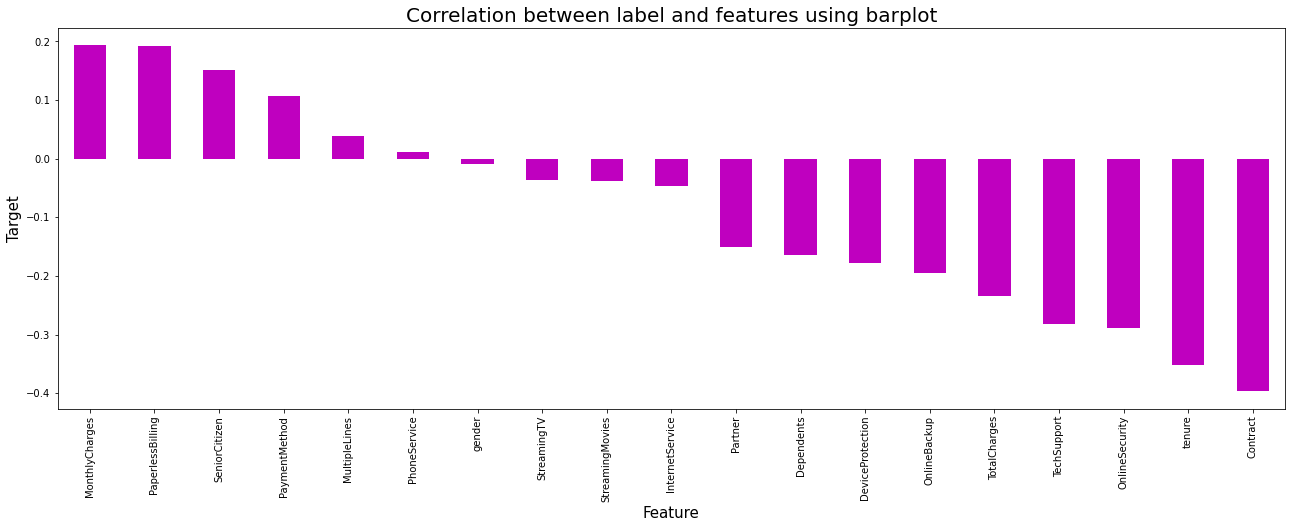

In [87]:
plt.figure(figsize = (22, 7))
df.corr()['Churn'].sort_values(ascending = False).drop(['Churn']).plot(kind='bar',color="m")
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize=20)
plt.show()

from the above bar plot we can notice the positive and negative correlation between the feature and the target. Here the feature gender and phone service have very less correlation with the columns

Separting the features and label

In [88]:
#feature is independent variable
#label means target variable
#removing the churn from the remaing columns
#X variable will have independent variables
#Y variable will have - stoing are churn variable
x = df.drop("Churn", axis = 1)
y = df["Churn"]

# Feature Scaling Standard Scalarization

In [89]:
#FT- from the previous learning the data will change, x columns- is indepenndent columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


We have scaled the data using Standard Scalarization method to overcome the issue of biasness.

# Checking the variance Inflation Factor(VIF)

In [90]:
#Finding variance inflation factor in each scaled column i.e X.shape[1] (1/(1-R2))
#1st import library
#vif-x.values an the independent  variable
#for i the range -using range function itrates over the columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

vif


,VIF values,Features
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


#gender columnns is not correlated with independent variables in the columns  in that purpose the value is 1 

*but vif value is 12 it , the relatiuojn ship b/w tenure columns and the remaining indepemndent columns is >12  when there was no multicolinearity

*Multicollinearity means there is a relation ship b/w two or more than two independent variable

*if any independent varaible has the vi value above 5 it shouild be droped from the data , but in general most of the people as per DS the threshould value is 10 as per vif value

*VIF value is <10 carry the same value in case VIF>1O drop the value

By checking VIF values we can find the features causing multicollineraity problem . Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with other features . We will drop one of the column first , if the same issue exist then we will try to remove the column having high VIF .

In [91]:
#Dropping the Total Charges columns
x.drop("TotalCharges", axis =1, inplace=True)
# This program already rumned 

In [92]:
#Agin chevking the VIF value to confirm whether the Multicollinearity still exists or noyt

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

vif


,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


So, we have solved multicolinearity issue we can now move head for model building

In [93]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

Here we can see that the data is no balanced, Since it is a classsification problem we will balance the data using oversampling method

# OverSampling

In [94]:
#OverSampling the data
#Smote is the one of the method to balnce the classes  using randum over smapling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [95]:
#Checking value count of target column
#the ratio is 1:1 
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

Now the data is balanced. Now we can build Machine learning classification models

Now EDS COMPLETED

*** Import the libraries****
do on graphical analysis
graphivcal analysis
    Univariate analysis
    Bivariate analysis
    Multivariate analysis
encode the categorical columns
Check outliers and remove it if present
check skewness and remove it if present
check multicollinearity
remove multicollinearity if present
apply feature scaling method on numerical features
apply resampling method to balnce the classes (in classification problems)

Also apply feature selection methods


***End of EDA Process****


# Modelling

# Finding the best random State

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuaracy is ", maxAccu, "at random_state", maxRS)
    

Best accuaracy is  0.8682769726247987 at random_state 102


The best accuracy id 86.44% at random_state 102

# Crating train test split

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state = maxRS)

# Classification Algorithms

In [99]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score


# RandomForestclassifier

In [100]:
#Checking accuracy for RandomForestClasifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8702093397745572
[[1371  199]
 [ 204 1331]]
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1570
         1.0       0.87      0.87      0.87      1535

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



The accuracy for thos model is 86.50%

# Logistic Regression

In [101]:
#Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.7887278582930757
[[1179  391]
 [ 265 1270]]
              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78      1570
         1.0       0.76      0.83      0.79      1535

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



The Accuracy score using LogisticRegression is 78.19%

In [102]:
#Checking accuracy for SupportVector Machine classifier
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8199677938808374
[[1217  353]
 [ 206 1329]]
              precision    recall  f1-score   support

         0.0       0.86      0.78      0.81      1570
         1.0       0.79      0.87      0.83      1535

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



The accuarcy score using Support vector Machine classifier is 81.46%

# Gradient Boosting Classifier

In [103]:
#Checking accuracy for Gradient boosting classifier
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8560386473429952
[[1306  264]
 [ 183 1352]]
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      1570
         1.0       0.84      0.88      0.86      1535

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



The accuracy_score using gradient Boosting Classifier is 85.37%

# AdaBoost Classifier

In [104]:
#Checking accuracy for Ada boost classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.8273752012882448
[[1259  311]
 [ 225 1310]]
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82      1570
         1.0       0.81      0.85      0.83      1535

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



The accuracy_score using Ada Boos Classifier is 82.83%

# BaggingClassifier

In [105]:
#Checking accuracy for Baggingclassifier
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.8312399355877617
[[1338  232]
 [ 292 1243]]
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84      1570
         1.0       0.84      0.81      0.83      1535

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



The accuracy_score using BaggingClassifier is 82.89%

here it is apply all the algorithems out of which which one will give me the best result we will select that model

# ExtraTreesClassifier

In [106]:
#Checking accuracy for ExtraGTreeClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.8689210950080515
[[1348  222]
 [ 185 1350]]
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1570
         1.0       0.86      0.88      0.87      1535

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



The accuracy scoreusing extraTreeClassifier is 86.43%

# Cross Validation Score

In [107]:
from sklearn.model_selection import cross_val_score

Cv=5 -- its a fold value 1,2,3,3,5

cross_val_score(modelname, feature, targetvariale, cv=foldvalue, scoring='accuracy)

in classification algorithem- default scoring parameter- accuaracy
for regression-default scoring parameter is - r2 score

_learn-google search =-coring parameter in cross validation- https://scikit-learn.org/stable/modules/model_evaluation.html

In [108]:
#checking cv score for Rabdomforest clasifier
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is-", accuracy_score(y_test,predRFC) - score.mean())

[0.78019324 0.7884058  0.88888889 0.90043499 0.90961817]
0.8535082176971768
Difference between Accuracy score and cross validation score is- 0.016701122077380393


In [109]:
#checking cv score for Logistic Regression
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is-", accuracy_score(y_test,predLR) - score.mean())

[0.77246377 0.7589372  0.7705314  0.78347028 0.79217013]
0.7755145546285983
Difference between Accuracy score and cross validation score is- 0.013213303664477372


In [110]:
#checking cv score for Gradient Boosting classifier
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is-", accuracy_score(y_test,predGB) - score.mean())

[0.74879227 0.78164251 0.86570048 0.88061866 0.88593523]
0.8325378312937939
Difference between Accuracy score and cross validation score is- 0.02350081604920129


In [111]:
#checking cv score for Support vector Machine classifier
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is-", accuracy_score(y_test,predsvc) - score.mean())

[0.77922705 0.77536232 0.81545894 0.82890285 0.83470275]
0.8067307831503936
Difference between Accuracy score and cross validation score is- 0.01323701073044381


In [112]:
#checking cv score for AdaBoost classifier
score = cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is-", accuracy_score(y_test,predABC) - score.mean())

[0.76570048 0.77536232 0.81642512 0.83905268 0.84533591]
0.808375303245751
Difference between Accuracy score and cross validation score is- 0.0189998980424938


In [113]:
#checking cv score for Bagging classifier
score = cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is-", accuracy_score(y_test,predBC) - score.mean())

[0.73816425 0.75217391 0.8589372  0.88545191 0.89173514]
0.8252924818402784
Difference between Accuracy score and cross validation score is- 0.005947453747483289


In [114]:
#checking cv score for Extar Tree classifier
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is-", accuracy_score(y_test,predET) - score.mean())

[0.81256039 0.80048309 0.89178744 0.9081682  0.90913485]
0.8644267925647295
Difference between Accuracy score and cross validation score is- 0.00449430244332194


Extra Tree classifier is our best model as the difference between accuaracy acore and across validation acore is least

# ExtraTreesclassifier is our best model

# Hyper parameter Tunning

In [115]:
#HYper PT - is giving you the more genaralized performance model 1st thing
#2nd thing-HPT- is used-improve the accuaracy and performance of the model
#ExtraTree classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
             'random_state': [10, 50, 1000],
             'max_depth': [0, 10, 20],
             'n_jobs': [-2, -1, 1],
             'n_estimators': [50, 100, 200, 300]}

In [116]:
#in cae we will not pass the cv it will difault select Cv=5
GCV=GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [117]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [118]:
#Google seach for parameter- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 10}

#To train the model use above parameter to test the data 

In [119]:
Final_model = ExtraTreesClassifier(criterion = 'gini', max_depth = 20, n_estimators = 300, n_jobs = -2, random_state = 1000)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

87.53623188405797


# Plotting ROC and compare AUC for all the model used

In [120]:
#Plotting ROC and Compare AUC for all the models used here
#This method is depressitated for the Sklearn in that purpose error are their 
#Below that one more code will be their 
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

disp = plot_roc_curve(ET, X_test, y_test) #ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax = disp.ax)
plot_roc_curve(LR, x_test, y_test, ax = disp.ax)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax)
plot_roc_curve(GB, x_test, y_test, ax = disp.ax)
plot_roc_curve(ABC, x_test, y_test, ax = disp.ax)
plot_roc_curve(BC, x_test, y_test, ax = disp.ax)

plt.legend(prop={'size':11}, loc = 'lower right')
plt.show()

NameError: name 'X_test' is not defined

In [2]:
disp = plot_roc_curve(ET, x_test, y_test) #ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax = disp.ax)
plot_roc_curve(LR, x_test, y_test, ax = disp.ax)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax)
plot_roc_curve(GB, x_test, y_test, ax = disp.ax)
plot_roc_curve(ABC, x_test, y_test, ax = disp.ax)
plot_roc_curve(BC, x_test, y_test, ax = disp.ax)

plt.legend(prop={'size':11}, loc = 'lower right')
plt.show()

NameError: name 'plot_roc_curve' is not defined

In [121]:
from sklearn.metrics import roc_auc_score
y_pred_prob = Final_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)

plt.plot([0,1],[0,1],'k--')
plt.plot(frp, trp, label='Random Forest classification(area=%0.2f)' % roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
auc_score = roc_auc_score(y_test, Final_model.predict(x_test))
print('Auc score:','\n',auc_score)

NameError: name 'auc' is not defined

In [ ]:
#check one with class vedios and also rise ticket

# Plotting ROC and compare AUC for the best model

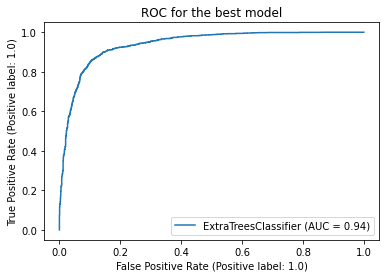

In [122]:
#lets check the AUC for the best model after hyper parameter tunning
plot_roc_curve(Final_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

Here we have plotted the ROC Curve for the final model and the AUC value for the best model is 94%

# Saving the model

In [123]:
#Saving the model
import joblib
joblib.dump(Final_model, "Telecom_Customer_Churn_Analysis.pkl")

['Telecom_Customer_Churn_Analysis.pkl']

# Predicting the Saved model

In [124]:
#Lets load the saved model and get the predictions
model = joblib.load("Telecom_Customer_Churn_Analysis.pkl")

#prediction
prediction = model.predict(x_test)
prediction

array([1., 0., 0., ..., 1., 1., 0.])

These are the predicted churned values of the customers.

In [125]:
a=np.array(y_test)
df = pd.DataFrame()
df["predicted"] = prediction
df["Original"] = a
df

AttributeError: module 'numpy' has no attribute 'arry'